# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [9]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [10]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [2]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [11]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [12]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [13]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

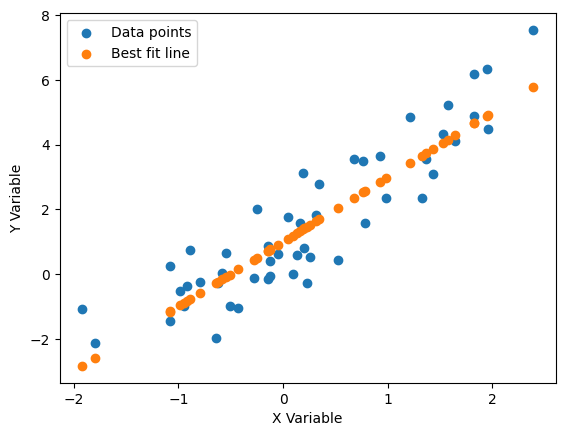

In [14]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [24]:
# Write your own code here

subset_above2=dataset.query("y >= 2")
print(len(dataset))
print(len(subset_above2))
print(len(subset_above2)/(dataset))

#???

50
19
             x           e             y           p
0    11.583785 -106.358942      4.632105    4.438788
1    20.494766   24.206369      5.221144    6.657015
2   -44.191362  -15.885500    -17.993176  135.614083
3  -133.008671  126.527633     21.978806   26.599306
4     9.710584  -45.082819      4.229921    3.867090
5   -20.765234   42.324729    -49.859395  -22.892070
6    73.973743  -19.048036     36.806184   12.552060
7   -35.002477   26.104689     29.585747 -221.865512
8   138.341429  -27.844933     32.076586   14.905670
9    28.096805   15.874628      5.353100    8.076628
10   98.593427   10.968413      6.094298   13.714241
11   36.308486  -11.731130     44.500144    9.283748
12 -148.618185  -57.562411     45.867715   25.526956
13   15.635552   13.372133      3.916537    5.538779
14  -24.044530   55.326983    -80.172794  -32.735986
15  -20.111475 -168.000562    -18.951419  -21.361069
16  116.790896   76.691370     12.077954   14.335643
17    7.952478   10.784595      2.519841

<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [32]:
# Note: abs(...) is the absolute value function
# Write your own code 


ybar = dataset["y"].mean()
stdv_sample=dataset["y"].std()
subset1=dataset.query("abs(y- @ybar) <= @stdv_sample")
display(subset1)


,x,e,y,p
1,0.927066,0.784917,3.639049,2.854132
3,-0.142848,0.150165,0.864469,0.714304
5,-0.914991,0.448910,-0.381072,-0.829982
6,0.256848,-0.997478,0.516218,1.513696
7,-0.542819,0.727839,0.642201,-0.085637
8,0.137341,-0.682350,0.592332,1.274683
9,0.676233,1.196878,3.549345,2.352467
10,0.192711,1.732247,3.117668,1.385421
11,0.523294,-1.619622,0.426965,2.046587
12,-0.127844,-0.330077,0.414235,0.744311


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [33]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf" - - ordinary least squares
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1") #hc1 robost standard errors

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [34]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.088180
x            2.048241
dtype: float64


<font size = "5">

Plot the best fit line

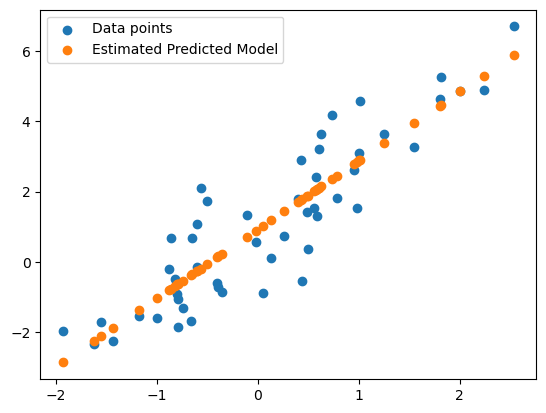

In [46]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

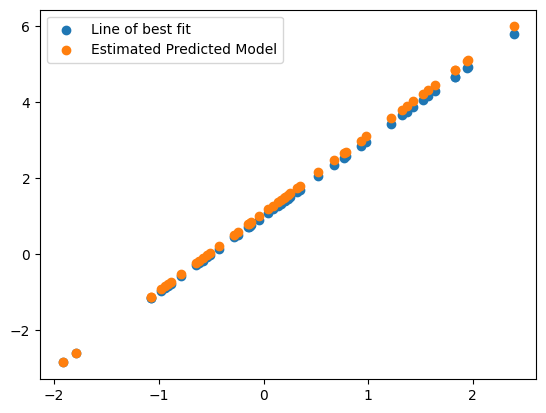

In [36]:

plt.scatter(x = dataset["x"],y = dataset["p"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Line of best fit","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [45]:
# Write your own code

sample_error = dataset["y"] - dataset["p_estimated"]
fn_postive_error= lambda error: error>=0
dataset["positivesampleerror"]=dataset["sample_error"].apply(fn_positive_error)

#???


KeyError: 'sample_error'

<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [43]:
# Write your own code

dataset["error_sqr"]=sample_error**2
dataset["error_sqr"].mean()


0.9727427094927026